In [1]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import plotly.express as px

# Cleaning and organizing data

In [2]:
# Read the data and convert 'CRASH DATE' column to datetime
mvc = pd.read_csv('../Data/Motor_Vehicle_Collisions_-_Crashes.csv')
mvc['CRASH DATE'] = pd.to_datetime(mvc['CRASH DATE'])

/var/folders/qb/p_v3j2wn6p56d1b5rh2xwd2m0000gn/T/ipykernel_93991/3017672389.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  mvc = pd.read_csv('../Data/Motor_Vehicle_Collisions_-_Crashes.csv')


In [3]:
# Extract the year from 'CRASH DATE' and store it in a new column 'YEAR'
mvc['YEAR'] = mvc['CRASH DATE'].dt.strftime('%Y')
mvc['YEAR'] = mvc['YEAR'].astype(int)

In [4]:
# Filter the data for years between 2016 and 2022
mvc = mvc[(mvc['YEAR'] > 2015) & (mvc['YEAR'] < 2023)]

In [5]:
# Filter the data for years between 2022 and 2023
mvc2 = mvc[(mvc['YEAR'] > 2021) & (mvc['YEAR'] < 2023)]

In [6]:
# Filter the data for **motorcycle collisions** between 2016 and 2022
mvc_motorcycles = mvc.isin(['Motorcycle', 'motorcycle']).any(axis=1)
df = mvc[mvc_motorcycles]

In [7]:
# Save the filtered data to a CSV file
df.to_csv('mvc_motorcycles.csv', index=False)

In [8]:
# Filter the data for **motorcycle collisions** between 2022 and 2023
mvc_motorcycles2 = mvc2.isin(['Motorcycle', 'motorcycle']).any(axis=1)
df2 = mvc2[mvc_motorcycles2]

In [9]:
# Drop rows with null values or zeros in 'LONGITUDE' and 'LATITUDE' columns for year 2016-2022 data
df_clean = df.dropna(subset=['LONGITUDE', 'LATITUDE'])
df_clean = df_clean[(df_clean['LONGITUDE'] != 0) & (df_clean['LATITUDE'] != 0)]

In [10]:
# Drop rows with null values or zeros in 'LONGITUDE' and 'LATITUDE' columns for year 2022 data
df2_clean = df2.dropna(subset=['LONGITUDE', 'LATITUDE'])
df2_clean = df2_clean[(df2_clean['LONGITUDE'] != 0) & (df2_clean['LATITUDE'] != 0)]

In [11]:
# Drop rows with null vales in 'BOROUGH' colums for year 2016 - 2021 data
df_extraclean = df.dropna(subset=['BOROUGH'])
df_extraclean.isnull().sum() 

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                             0
ZIP CODE                            3
LATITUDE                          366
LONGITUDE                         366
LOCATION                          366
ON STREET NAME                   2710
CROSS STREET NAME                2721
OFF STREET NAME                  5456
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1      10
CONTRIBUTING FACTOR VEHICLE 2    1225
CONTRIBUTING FACTOR VEHICLE 3    7524
CONTRIBUTING FACTOR VEHICLE 4    8022
CONTRIBUTING FACTOR VEHICLE 5    8113
COLLISION_ID                        0
VEHICLE TYPE CODE 1                 0
VEHICLE TYPE CODE 2              1637
VEHICLE TYPE

In [12]:
# Drop rows with null vales in 'BOROUGH' colums for year 2022 data
df2_extraclean = df2.dropna(subset=['BOROUGH'])
df2_extraclean.isnull().sum() 

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                             0
ZIP CODE                            0
LATITUDE                           29
LONGITUDE                          29
LOCATION                           29
ON STREET NAME                    341
CROSS STREET NAME                 343
OFF STREET NAME                   742
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1       2
CONTRIBUTING FACTOR VEHICLE 2     152
CONTRIBUTING FACTOR VEHICLE 3    1010
CONTRIBUTING FACTOR VEHICLE 4    1061
CONTRIBUTING FACTOR VEHICLE 5    1077
COLLISION_ID                        0
VEHICLE TYPE CODE 1                 0
VEHICLE TYPE CODE 2               223
VEHICLE TYPE

# My Yamaha R3

* I am interested in exploring this dataset because I own a motorcycle. I want to see what it tells me about motorcycle collisions in NYC.

# What is the percentage of motorcycle accidents 2016 - 2022?

In [13]:
total_crashes = len(mvc)
moto_crashes = len(df)
percentage = (moto_crashes/total_crashes) * 100
percentage

1.058879241791777

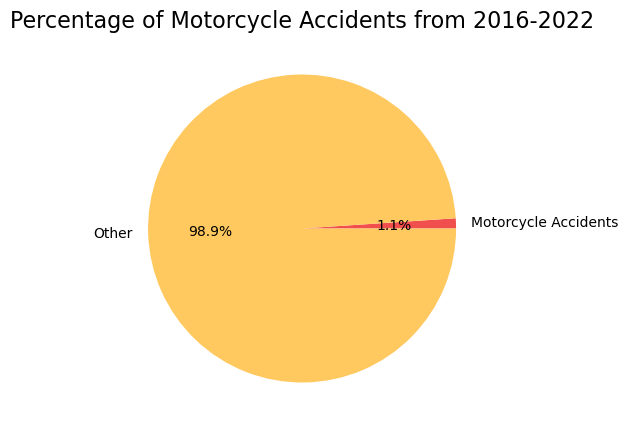

In [14]:
plt.figure(figsize=(5, 5))
colors = ['#F14E4E', '#FFC960']
labels = ['Motorcycle Accidents', 'Other']
sizes = [percentage, 100 - percentage]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of Motorcycle Accidents from 2016-2022', fontsize=16)

plt.show()

* This doesn't look like much but according to a 2016 DMV study, 2% of __registered__ vehicles in New York City are motorcycles.

***What is the probability of getting in a motorcycle accident?***

In [15]:
p_registered_moto = 0.02 # the probability of registered vehicles being motorcycles
p_moto_crash = 0.011 # the probability of motor vehicle crashes involving a motorcycle
p_crash = p_moto_crash / p_registered_moto # the probability of getting into a motorcycle crash
p_crash

0.5499999999999999

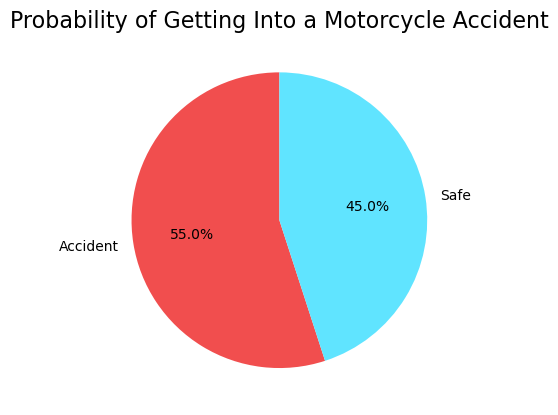

In [16]:
colors = ['#F14E4E', '#60E4FF']
labels = ['Accident', 'Safe']
values = [p_crash, 1 - p_crash]

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Probability of Getting Into a Motorcycle Accident', fontsize=16)

plt.show()

# How have dangers improved or worsened throughout the years?

In [17]:
total_yearly_accident = df['YEAR'].value_counts()
total_yearly_accident

2017    2095
2018    2076
2016    2004
2019    1953
2021    1726
2022    1668
2020    1514
Name: YEAR, dtype: int64

Text(0, 0.5, 'Frequency')

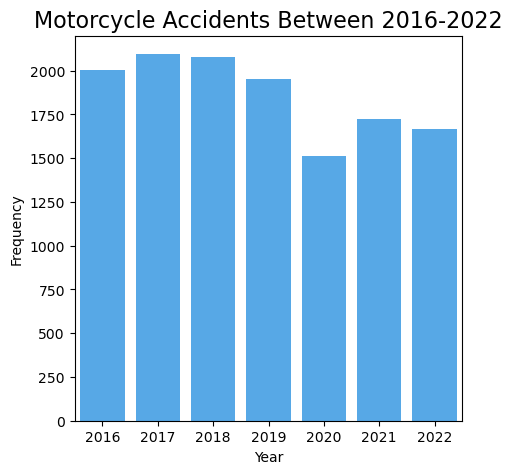

In [18]:
fig = plt.figure(figsize=(5, 5))
sns.barplot(x=total_yearly_accident.index, y=total_yearly_accident.values, color = '#3FABFE')
plt.title('Motorcycle Accidents Between 2016-2022', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Frequency')

# Are there any hotspots for accidents in NYC?
* null values were removed to answer this question as well as longitude and latitude values of 0

In [19]:
boroughs = df_extraclean['BOROUGH'].value_counts()
boroughs

BROOKLYN         2858
QUEENS           2032
MANHATTAN        1742
BRONX            1269
STATEN ISLAND     265
Name: BOROUGH, dtype: int64

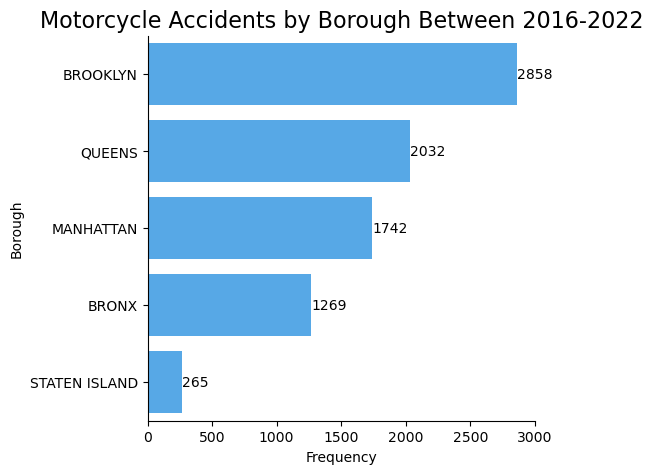

In [20]:
fig = plt.figure(figsize=(5, 5))
sns.barplot(x=boroughs.values, y=boroughs.index, color = '#3FABFE')
sns.despine()
plt.title('Motorcycle Accidents by Borough Between 2016-2022', fontsize = 16)
plt.xlabel('Frequency')
plt.ylabel('Borough')
for i, v in enumerate(boroughs.values):
    plt.text(v, i, str(v), ha='left', va='center')


# Map of motorcycle accidents throughout NYC with the latest full year of data (2022)

In [21]:
# create a list of our conditions
conditions = [    (df2_clean['NUMBER OF PERSONS INJURED'] == 0) & (df2_clean['NUMBER OF PERSONS KILLED'] == 0),
    (df2_clean['NUMBER OF PERSONS INJURED'] >= 1) ,
    (df2_clean['NUMBER OF PERSONS KILLED'] >= 1)
]

# create a list of the values we want to assign for each condition
values = ['NO INJURY/FATALITY', 'INJURED', 'FATALITY']

# create a new column and use np.select to assign values to it using our lists as arguments
df2_clean['VICTIM STATUS'] = np.select(conditions, values)

# display updated DataFrame
pd.set_option('display.max_columns', None)
df2_clean.head()

CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
98   2022-03-21      12:05  MANHATTAN  10018.0  40.756320 -73.999275   
106  2022-03-26      14:05   BROOKLYN  11210.0  40.635063 -73.947880   
128  2022-03-23       9:00        NaN      NaN  40.676390 -73.971890   
147  2022-03-25      17:55        NaN      NaN  40.683270 -73.950160   
1803 2022-03-26      15:03   BROOKLYN  11222.0  40.732070 -73.944620   

                    LOCATION      ON STREET NAME  CROSS STREET NAME  \
98    (40.75632, -73.999275)                 NaN                NaN   
106   (40.635063, -73.94788)                 NaN                NaN   
128    (40.67639, -73.97189)     FLATBUSH AVENUE                NaN   
147    (40.68327, -73.95016)     NOSTRAND AVENUE                NaN   
1803   (40.73207, -73.94462)  NORTH HENRY STREET  GREENPOINT AVENUE   

                OFF STREET NAME  NUMBER OF PERSONS INJURED  \
98     515       WEST 36 STREET                        1.0   
106   2067      NOSTRAND AVENUE                        1.0   
128                         NaN                        1.0   
147                         NaN                        0.0   
1803                        NaN                        1.0   

      NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
98                         0.0                              0   
106                        0.0                              0   
128                        0.0                              0   
147                        0.0                              0   
1803                       0.0                              0   

      NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
98                               0                          0   
106                              0                          0   
128                              0                          0   
147                              0                          0   
1803                             0                          0   

      NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
98                           0                           1   
106                          0                           1   
128                          0                           1   
147                          0                           0   
1803                         0                           1   

      NUMBER OF MOTORIST KILLED  \
98                            0   
106                           0   
128                           0   
147                           0   
1803                          0   

                          CONTRIBUTING FACTOR VEHICLE 1  \
98                                Following Too Closely   
106                                        Unsafe Speed   
128                         Traffic Control Disregarded   
147                         Traffic Control Disregarded   
1803  Pedestrian/Bicyclist/Other Pedestrian Error/Co...   

     CONTRIBUTING FACTOR VEHICLE 2 CONTRIBUTING FACTOR VEHICLE 3  \
98                     Unspecified                           NaN   
106                    Unspecified                           NaN   
128                    Unspecified                           NaN   
147                    Unspecified                           NaN   
1803                           NaN                           NaN   

     CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5  \
98                             NaN                           NaN   
106                            NaN                           NaN   
128                            NaN                           NaN   
147                            NaN                           NaN   
1803                           NaN                           NaN   

      COLLISION_ID                  VEHICLE TYPE CODE 1 VEHICLE TYPE CODE 2  \
98         4514237                           Motorcycle               Sedan   
106        4513874  Station Wagon/Sport Utility Vehicle          Motorcycle

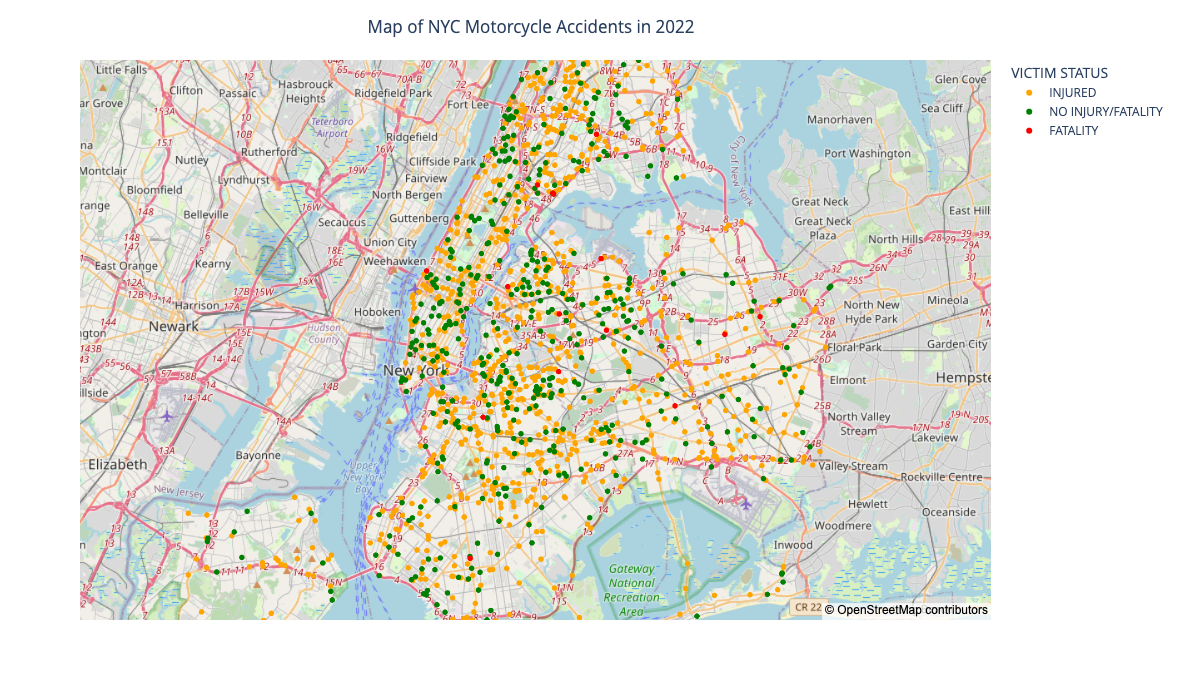

In [22]:
victim = ['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']
color_map = {'NO INJURY/FATALITY': 'green', 'INJURED': 'orange', 'FATALITY': 'red'}

fig = px.scatter_mapbox(df2_clean, 
                        lat='LATITUDE', 
                        lon='LONGITUDE',
                        hover_data = victim,
                        color = 'VICTIM STATUS',
                        color_discrete_map=color_map,
                        zoom=10,
                        height=700, 
                        width=900)
fig.update_layout(mapbox_style="open-street-map",
                  title={
                      'text': 'Map of NYC Motorcycle Accidents in 2022',
                      'y':.97,
                      'x':0.45,
                      'xanchor': 'center',
                      'yanchor': 'top'})

* Strengthens the argument that Brooklyn, Queens and Manhattan are the top 3 spots for motorcycle accidents.
* Surprisingly, most accidents are on the streets as opposed to an expressway or highway. However, there are more fatalities on highways and busy avenues.
* If motorcycles are more prone to accidents on the streets rather than a expressway or freeway, this makes sense why most accidents are in BK.

# Is there a certain time of the year, week, or day that motorcyclists should be extra cautious?

In [23]:
# year
counts = df2.groupby(["CRASH DATE"]).size()
counts

CRASH DATE
2022-01-02    1
2022-01-04    4
2022-01-06    4
2022-01-08    2
2022-01-10    1
             ..
2022-12-25    1
2022-12-28    3
2022-12-29    5
2022-12-30    3
2022-12-31    1
Length: 322, dtype: int64

Text(0.5, 1.0, 'Motorcycle Accident Frequency in 2022')

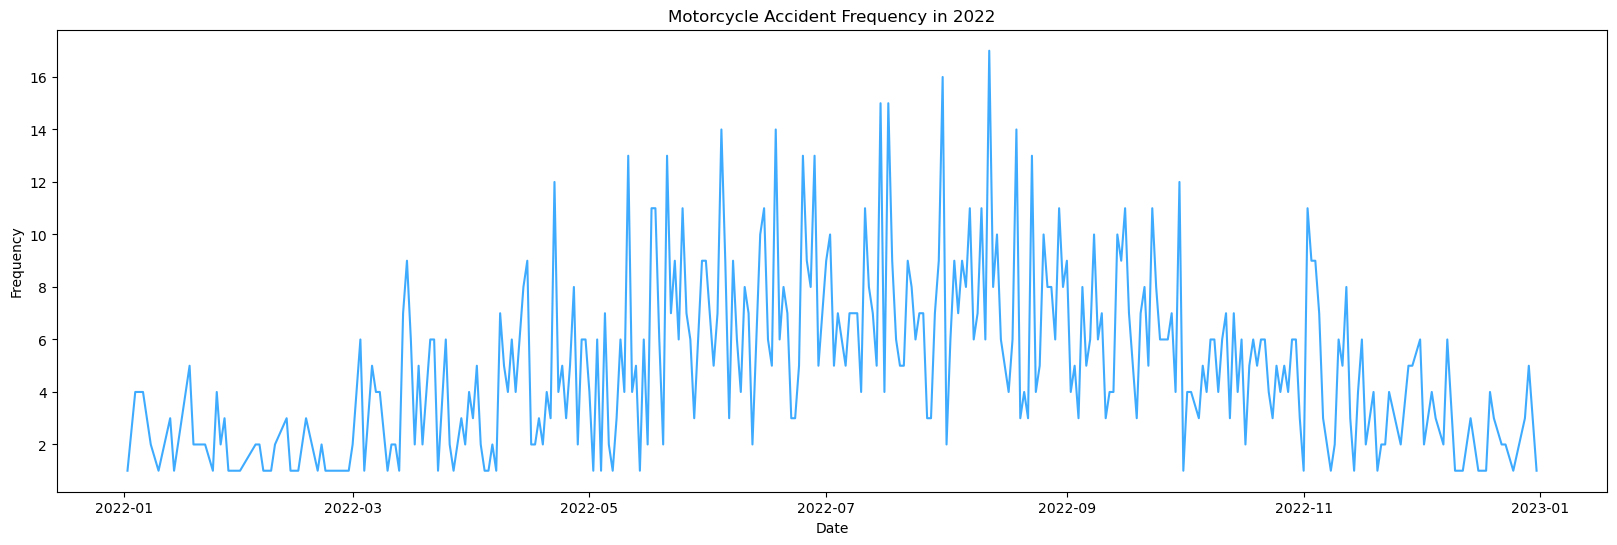

In [24]:
fig = plt.figure(figsize=(20, 6))
plt.plot(counts.index, counts.values, color = '#3FABFE')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Motorcycle Accident Frequency in 2022')

* Many accidents in one day are more frequent in the warmer months of the year. Most likely due to the fact that more people are riding in the warm weather, therefore more opportunity for accidents to happen.

In [25]:
# day of the week
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['DAY OF WEEK'] = df['CRASH DATE'].apply(lambda x: x.strftime('%A'))
df.head()

/var/folders/qb/p_v3j2wn6p56d1b5rh2xwd2m0000gn/T/ipykernel_93991/2424822226.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qb/p_v3j2wn6p56d1b5rh2xwd2m0000gn/T/ipykernel_93991/2424822226.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
98  2022-03-21      12:05  MANHATTAN  10018.0  40.756320 -73.999275   
106 2022-03-26      14:05   BROOKLYN  11210.0  40.635063 -73.947880   
128 2022-03-23       9:00        NaN      NaN  40.676390 -73.971890   
147 2022-03-25      17:55        NaN      NaN  40.683270 -73.950160   
293 2021-08-29       0:12        NaN      NaN  40.611700 -74.139180   

                   LOCATION     ON STREET NAME CROSS STREET NAME  \
98   (40.75632, -73.999275)                NaN               NaN   
106  (40.635063, -73.94788)                NaN               NaN   
128   (40.67639, -73.97189)    FLATBUSH AVENUE               NaN   
147   (40.68327, -73.95016)    NOSTRAND AVENUE               NaN   
293    (40.6117, -74.13918)  VICTORY BOULEVARD     HARVEY AVENUE   

               OFF STREET NAME  NUMBER OF PERSONS INJURED  \
98    515       WEST 36 STREET                        1.0   
106  2067      NOSTRAND AVENUE                        1.0   
128                        NaN                        1.0   
147                        NaN                        0.0   
293                        NaN                        1.0   

     NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
98                        0.0                              0   
106                       0.0                              0   
128                       0.0                              0   
147                       0.0                              0   
293                       0.0                              0   

     NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
98                              0                          0   
106                             0                          0   
128                             0                          0   
147                             0                          0   
293                             0                          0   

     NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
98                          0                           1   
106                         0                           1   
128                         0                           1   
147                         0                           0   
293                         0                           1   

     NUMBER OF MOTORIST KILLED   CONTRIBUTING FACTOR VEHICLE 1  \
98                           0           Following Too Closely   
106                          0                    Unsafe Speed   
128                          0     Traffic Control Disregarded   
147                          0     Traffic Control Disregarded   
293                          0  Driver Inattention/Distraction   

    CONTRIBUTING FACTOR VEHICLE 2 CONTRIBUTING FACTOR VEHICLE 3  \
98                    Unspecified                           NaN   
106                   Unspecified                           NaN   
128                   Unspecified                           NaN   
147                   Unspecified                           NaN   
293                   Unspecified                           NaN   

    CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
98                            NaN                           NaN       4514237   
106                           NaN                           NaN       4513874   
128                           NaN                           NaN       4514160   
147                           NaN                           NaN       4514241   
293                           NaN                           NaN       4456782   

                     VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
98                            Motorcycle                                Sedan   
106  Station Wagon/Sport Utility Vehicle                           Motorcycle   
128                                Sedan                           Motorcycle   
147                                Sedan             

In [26]:
day = df['DAY OF WEEK'].value_counts()
day

Saturday     2052
Friday       2048
Thursday     1853
Wednesday    1835
Sunday       1834
Tuesday      1747
Monday       1667
Name: DAY OF WEEK, dtype: int64

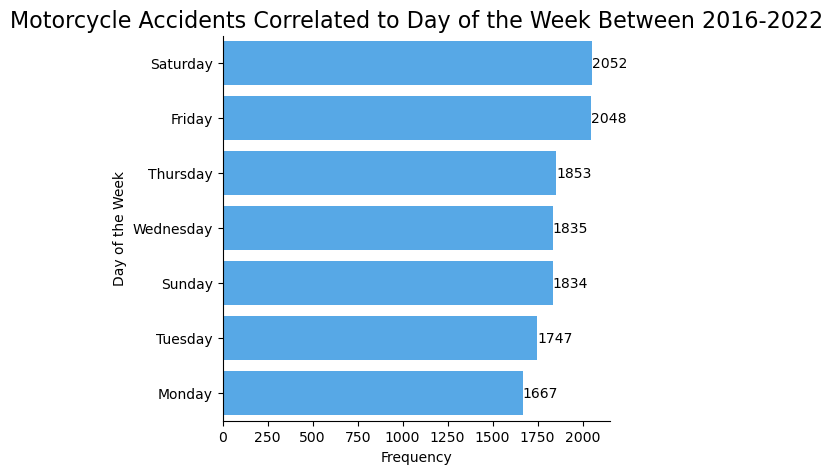

In [27]:
fig = plt.figure(figsize=(5, 5))
sns.barplot(x=day.values, y=day.index, color = '#3FABFE')
sns.despine()
plt.title('Motorcycle Accidents Correlated to Day of the Week Between 2016-2022',fontsize = 16)
plt.xlabel('Frequency')
plt.ylabel('Day of the Week')
for i, v in enumerate(day.values):
    plt.text(v, i, str(v), ha='left', va='center')

* Friday and Saturday are the top 2 days for motorcycle accidents.

In [28]:
# Time of day
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])
df['CRASH HOUR'] = df['CRASH TIME'].dt.hour
crash_counts = df.pivot_table(index='CRASH HOUR', aggfunc='size')
crash_counts = crash_counts.values.reshape(24,1)

/var/folders/qb/p_v3j2wn6p56d1b5rh2xwd2m0000gn/T/ipykernel_93991/1570473034.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qb/p_v3j2wn6p56d1b5rh2xwd2m0000gn/T/ipykernel_93991/1570473034.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Frequency of Motorcycle Accidents by Hour of Day (2016-2022)')

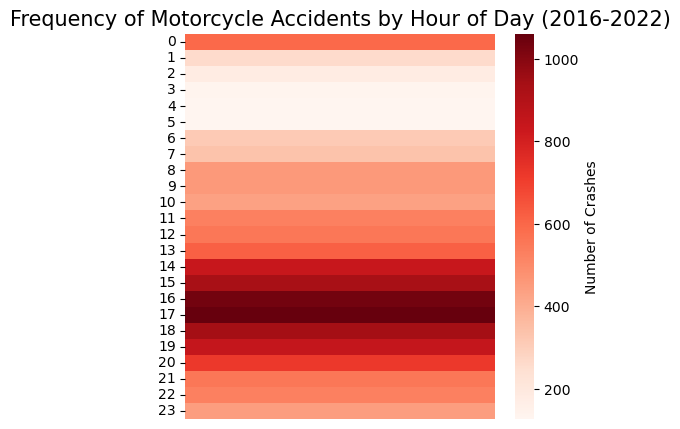

In [29]:
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(crash_counts, cmap='Reds', xticklabels=False, yticklabels=range(24), cbar=True)
heatmap.collections[0].colorbar.set_label("Number of Crashes")
plt.title("Frequency of Motorcycle Accidents by Hour of Day (2016-2022)", fontsize=15)

* Majority of motorcycle accidents occur in the evening hours. With the most accidents happening around 4 pm and 5 pm.

# What is the likelihood of a fatality/injury when a motorcycle gets into an accident?

In [30]:
# create a list of our conditions
conditions = [    (df['NUMBER OF PERSONS INJURED'] == 0) & (df['NUMBER OF PERSONS KILLED'] == 0),
    (df['NUMBER OF PERSONS INJURED'] >= 1) ,
    (df['NUMBER OF PERSONS KILLED'] >= 1)
]

# create a list of the values we want to assign for each condition
values = ['NO INJURY/FATALITY', 'INJURED', 'FATALITY']

# create a new column and use np.select to assign values to it using our lists as arguments
df['VICTIM STATUS'] = np.select(conditions, values)

# display updated DataFrame
pd.set_option('display.max_columns', None)
df.head()

/var/folders/qb/p_v3j2wn6p56d1b5rh2xwd2m0000gn/T/ipykernel_93991/3023804654.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CRASH DATE          CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
98  2022-03-21 2023-06-13 12:05:00  MANHATTAN  10018.0  40.756320 -73.999275   
106 2022-03-26 2023-06-13 14:05:00   BROOKLYN  11210.0  40.635063 -73.947880   
128 2022-03-23 2023-06-13 09:00:00        NaN      NaN  40.676390 -73.971890   
147 2022-03-25 2023-06-13 17:55:00        NaN      NaN  40.683270 -73.950160   
293 2021-08-29 2023-06-13 00:12:00        NaN      NaN  40.611700 -74.139180   

                   LOCATION     ON STREET NAME CROSS STREET NAME  \
98   (40.75632, -73.999275)                NaN               NaN   
106  (40.635063, -73.94788)                NaN               NaN   
128   (40.67639, -73.97189)    FLATBUSH AVENUE               NaN   
147   (40.68327, -73.95016)    NOSTRAND AVENUE               NaN   
293    (40.6117, -74.13918)  VICTORY BOULEVARD     HARVEY AVENUE   

               OFF STREET NAME  NUMBER OF PERSONS INJURED  \
98    515       WEST 36 STREET                        1.0   
106  2067      NOSTRAND AVENUE                        1.0   
128                        NaN                        1.0   
147                        NaN                        0.0   
293                        NaN                        1.0   

     NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
98                        0.0                              0   
106                       0.0                              0   
128                       0.0                              0   
147                       0.0                              0   
293                       0.0                              0   

     NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
98                              0                          0   
106                             0                          0   
128                             0                          0   
147                             0                          0   
293                             0                          0   

     NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
98                          0                           1   
106                         0                           1   
128                         0                           1   
147                         0                           0   
293                         0                           1   

     NUMBER OF MOTORIST KILLED   CONTRIBUTING FACTOR VEHICLE 1  \
98                           0           Following Too Closely   
106                          0                    Unsafe Speed   
128                          0     Traffic Control Disregarded   
147                          0     Traffic Control Disregarded   
293                          0  Driver Inattention/Distraction   

    CONTRIBUTING FACTOR VEHICLE 2 CONTRIBUTING FACTOR VEHICLE 3  \
98                    Unspecified                           NaN   
106                   Unspecified                           NaN   
128                   Unspecified                           NaN   
147                   Unspecified                           NaN   
293                   Unspecified                           NaN   

    CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
98                            NaN                           NaN       4514237   
106                           NaN                           NaN       4513874   
128                           NaN                           NaN       4514160   
147                           NaN                           NaN       4514241   
293                           NaN                           NaN       4456782   

                     VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
98                            Motorcycle                                Sedan   
106  Station Wagon/Sport Utility Vehicle                           Motorcycle   
128                                Sedan                           Motorcycle   

In [31]:
accident_results = df['VICTIM STATUS'].value_counts()
accident_results

INJURED               7555
NO INJURY/FATALITY    5325
FATALITY               156
Name: VICTIM STATUS, dtype: int64

In [32]:
sum_fatalities = df[['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']].sum()
sum_fatalities

NUMBER OF PEDESTRIANS KILLED      6
NUMBER OF CYCLIST KILLED          1
NUMBER OF MOTORIST KILLED       213
dtype: int64

In [33]:
sum_injuries = df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']].sum()
sum_injuries

NUMBER OF PEDESTRIANS INJURED     386
NUMBER OF CYCLIST INJURED         124
NUMBER OF MOTORIST INJURED       8087
dtype: int64

In [34]:
# create a list of our conditions
conditions = [    (mvc['NUMBER OF PERSONS INJURED'] == 0) & (mvc['NUMBER OF PERSONS KILLED'] == 0),
    (mvc['NUMBER OF PERSONS INJURED'] >= 1) ,
    (mvc['NUMBER OF PERSONS KILLED'] >= 1)
]

# create a list of the values we want to assign for each condition
values = ['NO INJURY/FATALITY', 'INJURED', 'FATALITY']

# create a new column and use np.select to assign values to it using our lists as arguments
mvc['VICTIM STATUS'] = np.select(conditions, values)

# display updated DataFrame
pd.set_option('display.max_columns', None)
mvc.head()

CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0 2021-09-11       2:39       NaN      NaN        NaN        NaN   
1 2022-03-26      11:45       NaN      NaN        NaN        NaN   
2 2022-06-29       6:55       NaN      NaN        NaN        NaN   
3 2021-09-11       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4 2021-12-14       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  NUMBER OF PERSONS INJURED  \
0                      NaN                        2.0   
1                      NaN                        1.0   
2                      NaN                        0.0   
3  1211      LORING AVENUE                        0.0   
4                      NaN                        0.0   

   NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
0                       0.0                              0   
1                       0.0                              0   
2                       0.0                              0   
3                       0.0                              0   
4                       0.0                              0   

   NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
0                         0                           2   
1                         0                           1   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   NUMBER OF MOTORIST KILLED CONTRIBUTING FACTOR VEHICLE 1  \
0                          0  Aggressive Driving/Road Rage   
1                          0             Pavement Slippery   
2                          0         Following Too Closely   
3                          0                   Unspecified   
4                          0                           NaN   

  CONTRIBUTING FACTOR VEHICLE 2 CONTRIBUTING FACTOR VEHICLE 3  \
0                   Unspecified                           NaN   
1                           NaN                           NaN   
2                   Unspecified                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

  CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                           NaN                           NaN       4455765   
1                           NaN                           NaN       4513547   
2                           NaN                           NaN       4541903   
3                           NaN                           NaN       4456314   
4                           NaN                           NaN       4486609   

  VEHICLE TYPE CODE 1 VEHICLE TYPE CODE 2 VEHICLE TYPE CODE 3  \
0               Sedan               Sedan                 NaN   
1               Sedan                 NaN                 NaN   
2               Sedan       Pick-up Truck                 NaN   
3               Sedan                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  YEAR       VICTIM STATUS  
0         

In [35]:
total_results = mvc['VICTIM STATUS'].value_counts()
total_results

NO INJURY/FATALITY    939490
INJURED               290290
FATALITY                1310
0                         23
Name: VICTIM STATUS, dtype: int64

In [36]:
percentage_fatalities = (156/1310)*100
percentage_fatalities

11.908396946564885

Text(0.5, 1.0, 'Victim Status of Motorcycles in Accidents Between 2016-2022')

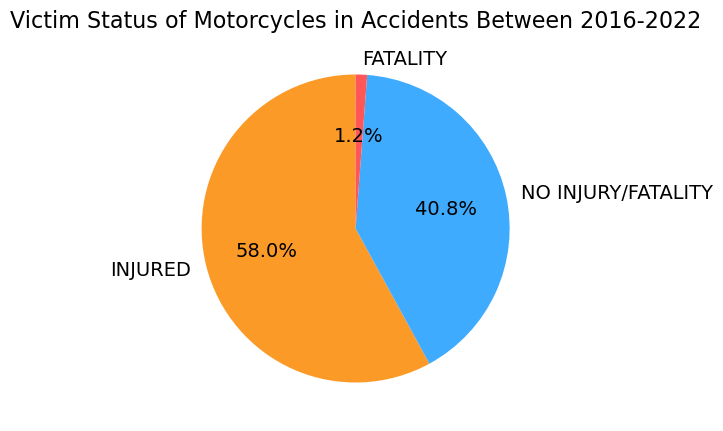

In [37]:
colors = ['#FB9A27', '#3FABFE', '#FF5757']
plt.subplots(figsize=(5, 5))
plt.pie(accident_results, labels=accident_results.index,autopct='%1.1f%%',colors=colors, startangle = 90, textprops=dict(fontsize=14))
plt.title('Victim Status of Motorcycles in Accidents Between 2016-2022', fontsize=16)

Text(0.5, 1.0, 'Fatalities by Vehicle from 2016-2022')

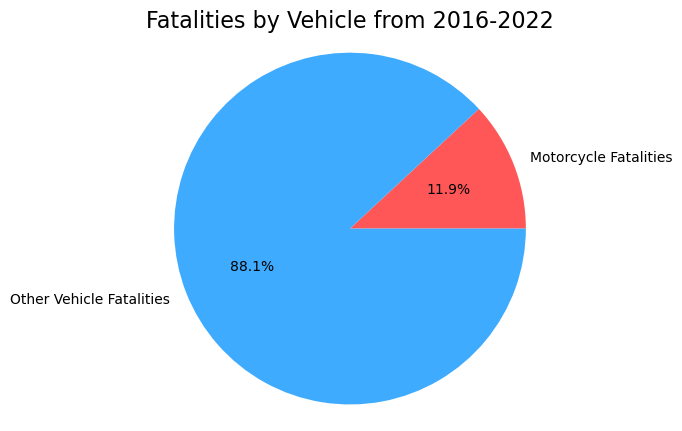

In [38]:
labels = ['Motorcycle Fatalities', 'Other Vehicle Fatalities']
colors = ['#FF5757', '#3FABFE']
plt.figure(figsize=(5, 5))
sizes = [percentage_fatalities, 100-percentage_fatalities]
plt.pie(sizes, labels=labels,colors = colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Fatalities by Vehicle from 2016-2022', fontsize = 16)

# Do I regret it? Well..

* Riding a motorcycle carries a high level of risk.
* Motorcycle fatalities account for nearly 12% of all vehicle fatalities in NYC, despite motorcycles comprising only 2% of registered vehicles.
* Accidents are prevalent across various locations, but extra caution is advised on highways, expressways, and busy avenues where more fatalities occur.
* The majority of accidents happen during the warmer months, weekends, and rush hours. Opting for rides in cooler months, weekdays, and morning hours can reduce the risk.
* Getting into a motorcycle accident doesn't necessarily mean a fatality, but the risk for injury is higher compared to no injury.
* Being a defensive driver is crucial when riding a motorcycle. It is essential to wear protective gear for personal safety.